In [1]:
# ==============================================================================
# Title:        Temperature Plotting Script
# Author:       Wanderson Souza Araujo
# Created:      12/22/2023
# Last Updated: 07/19/2024
# Description:  This script reads temperature data from an OSZICAR file and
#               generates plots for TE and SA with corresponding
#               temperature color maps.
# Usage:        Run this script in a Python environment with matplotlib and
#               other necessary libraries installed.
# ==============================================================================
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm


In [2]:
#path for OSZICAR from Simulated anealling
oszicar_path = 'OSZICAR_sa'

# List to store lines with "T="
temperatures = []

# Open and Read the OSZICAR file
with open(oszicar_path, 'r') as f:
    lines = f.readlines()

# Filter lines with "T=" 
for line in lines:
    if "T=" in line:
        temperature = float(line.split("T=")[1].split()[0])
        temperatures.append(temperature)
# See the temperatures lines (uncomment for see all lines with "T")
#for line in lines:
    #if "T=" in line:
        #print(line)

In [3]:
#path for OSZICAR from Termalization
oszicar_path = 'OSZICAR_te'

# List to store lines with "T="
temperaturesterm = []

# Open and Read the OSZICAR file
with open(oszicar_path, 'r') as f:
    lines = f.readlines()

# Open and Read the OSZICAR file
for line in lines:
    if "T=" in line:
        temperature = float(line.split("T=")[1].split()[0])
        temperaturesterm.append(temperature)

# See the temperatures lines (uncomment for see all lines with "T")
#for line in lines:
#    if "T=" in line:
#        print(line)

In [4]:
# The steps must be adjusted according to the timesteps configured for the MD in VASP.
stepsn = np.arange(0, 5000)/1000


/tmp/ipykernel_28314/3045259544.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('turbo')  # You can choose other color maps


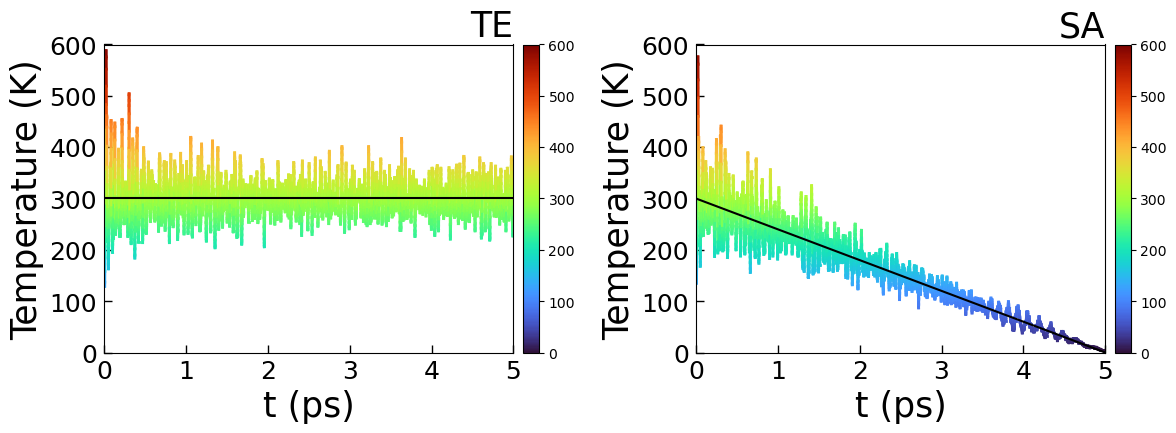

In [5]:
# Create a colormap based on temperatures
cmap = cm.get_cmap('turbo')  # You can choose other color maps
norm = plt.Normalize(0, 600)

# Create subplots
fig, ((ax1), (ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))

# Plot graph for TE
for i in range(len(stepsn) - 1):
    color = cmap(norm(temperaturesterm[i]))
    ax1.plot(stepsn[i:i+2], temperaturesterm[i:i+2], color=color, linewidth=2)

ax1.set_xlabel('t (ps)', fontsize=25)
ax1.set_ylabel('Temperature (K)', fontsize=25)
ax1.set_title('TE', fontsize=25, loc='right')
ax1.axhline(y=300, color='black', linestyle='-', label='Value 300')
ax1.tick_params(axis='both', which='both', direction='in', pad=5, length=6, width=1, labelsize=18)
ax1.set_xlim(0, 5)
ax1.set_ylim(0, 600)

# Add color bar
sm1 = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm1.set_array([])  # Adds an empty array to avoid a scale error
cbar1 = fig.colorbar(sm1, ax=ax1, orientation='vertical', pad=0.02)

# Plot graph for SA
for i in range(len(stepsn) - 1):
    color = cmap(norm(temperatures[i]))
    ax2.plot(stepsn[i:i+2], temperatures[i:i+2], color=color, linewidth=2)
# Plot the line of SA
ax2.plot([0, 5], [300, 0], color='black', linestyle='-', label='Line')
ax2.set_xlabel('t (ps)', fontsize=25)
ax2.set_ylabel('Temperature (K)', fontsize=25)
ax2.set_title('SA', fontsize=25, loc='right')
ax2.tick_params(axis='both', which='both', direction='in', pad=5, length=6, width=1, labelsize=18)
ax2.set_xlim(0, 5)
ax2.set_ylim(0, 600)

# Add color bar
sm2 = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm2.set_array([])  # Adds an empty array to avoid a scale error
cbar2 = fig.colorbar(sm2, ax=ax2, orientation='vertical', pad=0.02)

plt.show()


/tmp/ipykernel_28314/1258659005.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('turbo')  # You can choose other color maps


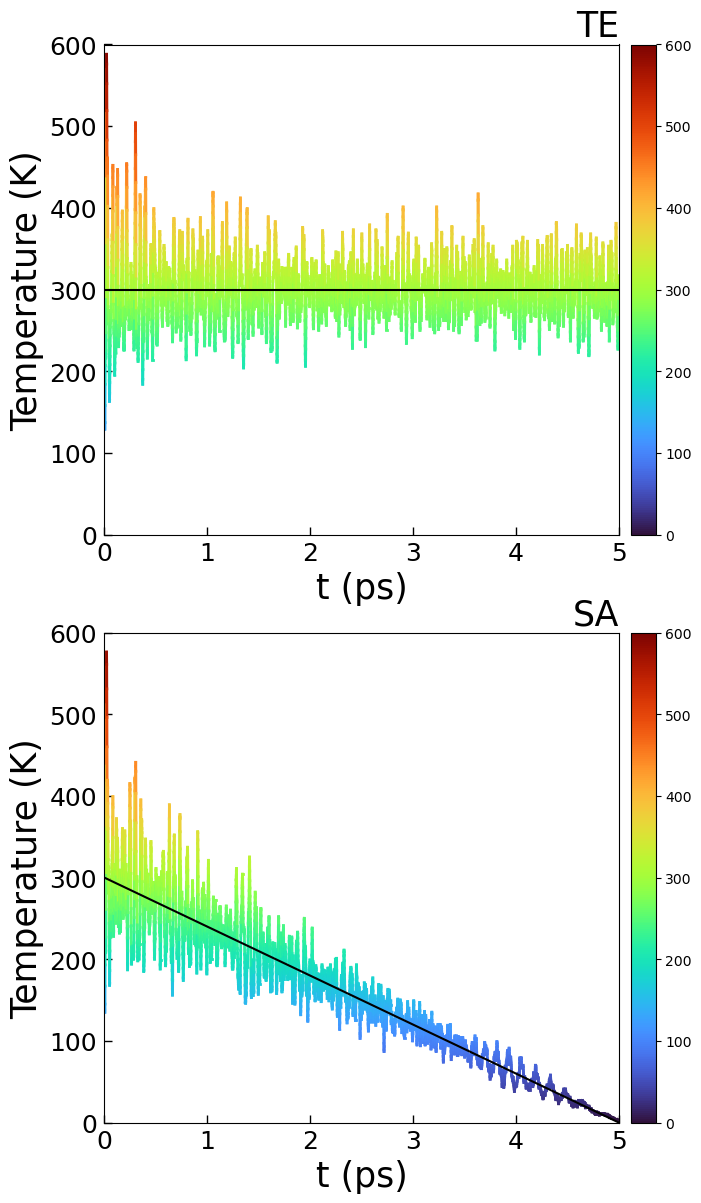

In [6]:
#Same graph but vertical

# Create a colormap based on temperatures
cmap = cm.get_cmap('turbo')  # You can choose other color maps
norm = plt.Normalize(0, 600)

# Create subplots
fig, ((ax1), (ax2)) = plt.subplots(nrows=2, ncols=1, figsize=(8, 14))

# Plot graph for TE
for i in range(len(stepsn) - 1):
    color = cmap(norm(temperaturesterm[i]))
    ax1.plot(stepsn[i:i+2], temperaturesterm[i:i+2], color=color, linewidth=2)

ax1.set_xlabel('t (ps)', fontsize=25)
ax1.set_ylabel('Temperature (K)', fontsize=25)
ax1.set_title('TE', fontsize=25, loc='right')
ax1.axhline(y=300, color='black', linestyle='-', label='Value 300')
ax1.tick_params(axis='both', which='both', direction='in', pad=5, length=6, width=1, labelsize=18)
ax1.set_xlim(0, 5)
ax1.set_ylim(0, 600)

# Add color bar
sm1 = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm1.set_array([])  # Adds an empty array to avoid a scale error
cbar1 = fig.colorbar(sm1, ax=ax1, orientation='vertical', pad=0.02)

# Plot graph for SA
for i in range(len(stepsn) - 1):
    color = cmap(norm(temperatures[i]))
    ax2.plot(stepsn[i:i+2], temperatures[i:i+2], color=color, linewidth=2)
# Plot the line of SA
ax2.plot([0, 5], [300, 0], color='black', linestyle='-', label='Line')
ax2.set_xlabel('t (ps)', fontsize=25)
ax2.set_ylabel('Temperature (K)', fontsize=25)
ax2.set_title('SA', fontsize=25, loc='right')
ax2.tick_params(axis='both', which='both', direction='in', pad=5, length=6, width=1, labelsize=18)
ax2.set_xlim(0, 5)
ax2.set_ylim(0, 600)

# Add color bar
sm2 = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm2.set_array([])  # Adds an empty array to avoid a scale error
cbar2 = fig.colorbar(sm2, ax=ax2, orientation='vertical', pad=0.02)

plt.show()
